Quick tips --

* Shift-ENTER to execute cell and move to next
* Edit etc. cells whenever you want using mouse etc
* Use menu (Cell... Run All...) to rerun the whole thing

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd /mnt

/mnt


In [3]:
# check out simulation code for making genomes and reads
!git clone https://github.com/dib-lab/nullgraph.git kmers

Cloning into 'kmers'...
remote: Counting objects: 37, done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 37 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (37/37), done.
Checking connectivity... done.


In [4]:
cd kmers

/mnt/kmers


In [5]:
ls

Makefile                            make-random-genome.py
dens.ipynb                          make-random-transcriptome.py
fasta.py                            make-reads-biased-nonrandom.py
make-biased-reads.py                make-reads-biased-random.py
make-random-genome-with-repeats.py  make-reads.py


In [6]:
# build a random genome (1kb) with equal mixes of A/C/G/T
!python make-random-genome.py -l 10000 > genome.fa

In [7]:
# make reads at 100x coverage, 0 error.
!python make-reads.py --coverage 100 --read-length 100 --error-rate 0 genome.fa > reads-e000.fa
!head reads-e000.fa

0 of 10000 reads mutated; 0 total mutations
>read0
TGCACTAAATGTCGCCGTGCATCTCTTTCTATCTTCTTGTCCTAAGATGCGATGGCCCTTTATGAATGGTTGCCTTACACCGTCCCGTGATGAAGACGGA
>read1
GAGAGGAGTATCCTTCAAATATTCTTTAGCGGAGAGCAAGTCTACAACCATCATCAGAGGGGGAGTGGTCGGTACAGGATGATCGTGATAGCTTAGGGGC
>read2
AGGGTAATCGACGTGTCCGTAGTAATCGCATCCTAAGCACGACCCGTTCAAACCGTCCGCTGCAAGATATTTATGCAAGTGCAGAGGGGAATTATACCCG
>read3
CCCACTCCGAGCAGTACTGCGTATTGACGCTGTGTTCGTTACATCTAGTGTGGCGATAATCCACTACACGGTAGCGTAGGTTACCGTGGCGGCGGGGTGC
>read4
AACTCACTCTGGCCGTCACAATAGAATACCGCTATGTACACAAGATCTAAAGGAAAGCTTCCTAGTTTCAAAGACTGGTAGTGGGAGTAAGGCTTTCTAC


In [8]:
# count all k-mers in the database and extract a k-mer distribution
!abundance-dist-single.py -s -x 1e8 -k 20 reads-e000.fa reads-k20-e000.dist



|| This is the script 'abundance-dist-single.py' in khmer.
|| You are running khmer version 1.1
|| You are also using screed version 0.7
||
|| If you use this script in a publication, please cite EACH of the following:
||
||   * MR Crusoe et al., 2014. doi: 10.6084/m9.figshare.979190
||   * Q Zhang et al., arXiv:1309.2975 [q-bio.GN]
||
|| Please see the CITATION file for details.


PARAMETERS:
 - kmer size =    20 		(-k)
 - n tables =     4 		(-N)
 - min tablesize = 1e+08 	(-x)

Estimated memory usage is 4e+08 bytes (n_tables x min_tablesize)
--------
making k-mer counting table
building k-mer tracking table
kmer_size: 20
k-mer counting table sizes: [100000007L, 100000037L, 100000039L, 100000049L]
outputting to reads-k20-e000.dist
consuming input, round 1 -- reads-e000.fa
preparing hist from reads-e000.fa...
consuming input, round 2 -- reads-e000.fa


In [9]:
# in the dist file,
#    column 1 is the k-mer count
#    column 2 is the number of k-mers with that count
#    column 3 is the number of k-mers with less than or equal to that count
#    column 4 is the fraction of total k-mers with less than or equal to that count
!head reads-k20-e000.dist


0 0 0 0.0
1 2 2 0.0
2 0 2 0.0
3 4 6 0.001
4 2 8 0.001
5 2 10 0.001
6 1 11 0.001
7 2 13 0.001
8 1 14 0.001
9 6 20 0.002


In [10]:
# read in the numbers
dist = numpy.loadtxt('reads-k20-e000.dist', delimiter=',', skiprows=1)

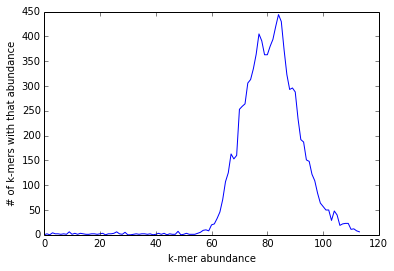

In [11]:
# plot the first two columns
plot(dist[:,0], dist[:,1])
xlabel('k-mer abundance')
ylabel('# of k-mers with that abundance')

In [12]:
# make more reads at different error rate
!python make-reads.py --coverage 100 --read-length 100 --error-rate .001 genome.fa > reads-e001.fa
!python make-reads.py --coverage 100 --read-length 100 --error-rate .01 genome.fa > reads-e010.fa
!python make-reads.py --coverage 100 --read-length 100 --error-rate .1 genome.fa > reads-e100.fa


934 of 10000 reads mutated; 986 total mutations
6258 of 10000 reads mutated; 10068 total mutations
9999 of 10000 reads mutated; 111189 total mutations


In [13]:
!abundance-dist-single.py -s -x 1e8 -k 20 reads-e001.fa reads-k20-e001.dist
!abundance-dist-single.py -s -x 1e8 -k 20 reads-e010.fa reads-k20-e010.dist
!abundance-dist-single.py -s -x 1e8 -k 20 reads-e100.fa reads-k20-e100.dist


|| This is the script 'abundance-dist-single.py' in khmer.
|| You are running khmer version 1.1
|| You are also using screed version 0.7
||
|| If you use this script in a publication, please cite EACH of the following:
||
||   * MR Crusoe et al., 2014. doi: 10.6084/m9.figshare.979190
||   * Q Zhang et al., arXiv:1309.2975 [q-bio.GN]
||
|| Please see the CITATION file for details.


PARAMETERS:
 - kmer size =    20 		(-k)
 - n tables =     4 		(-N)
 - min tablesize = 1e+08 	(-x)

Estimated memory usage is 4e+08 bytes (n_tables x min_tablesize)
--------
making k-mer counting table
building k-mer tracking table
kmer_size: 20
k-mer counting table sizes: [100000007L, 100000037L, 100000039L, 100000049L]
outputting to reads-k20-e001.dist
consuming input, round 1 -- reads-e001.fa
preparing hist from reads-e001.fa...
consuming input, round 2 -- reads-e001.fa

|| This is the script 'abundance-dist-single.py' in khmer.
|| You are running khmer version 1.1
|| You are also using screed version 0.7

In [14]:
# read in the numbers
dist1 = numpy.loadtxt('reads-k20-e000.dist', delimiter=',', skiprows=1)
dist2 = numpy.loadtxt('reads-k20-e001.dist', delimiter=',', skiprows=1)
dist3 = numpy.loadtxt('reads-k20-e010.dist', delimiter=',', skiprows=1)
dist4 = numpy.loadtxt('reads-k20-e100.dist', delimiter=',', skiprows=1)


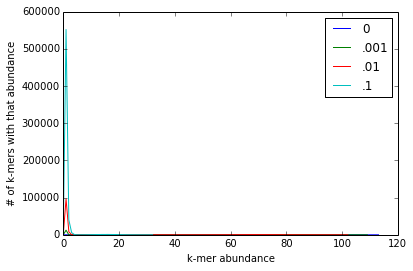

In [15]:
# errors produce a lot of low-abundance k-mers, distorting y axis
plot(dist1[:,0], dist1[:,1], label='0')
plot(dist2[:,0], dist2[:,1], label='.001')
plot(dist3[:,0], dist3[:,1], label='.01')
plot(dist4[:,0], dist4[:,1], label='.1')

xlabel('k-mer abundance')
ylabel('# of k-mers with that abundance')
legend()

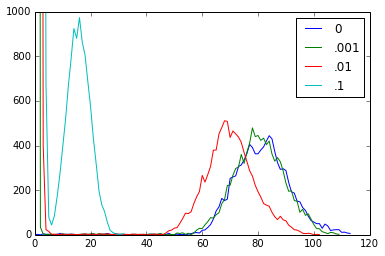

In [16]:
# so zoom in...
plot(dist1[:,0], dist1[:,1], label='0')
plot(dist2[:,0], dist2[:,1], label='.001')
plot(dist3[:,0], dist3[:,1], label='.01')
plot(dist4[:,0], dist4[:,1], label='.1')

axis(ymin=0, ymax=1000)
legend()

In [17]:
# what happens if we trim out all the unique k-mers? => reads.fa.abundfilt
!filter-abund-single.py -C 2 -k 20 -x 1e8 reads-e000.fa
!filter-abund-single.py -C 2 -k 20 -x 1e8 reads-e001.fa
!filter-abund-single.py -C 2 -k 20 -x 1e8 reads-e010.fa
!filter-abund-single.py -C 2 -k 20 -x 1e8 reads-e100.fa


|| This is the script 'filter-abund-single.py' in khmer.
|| You are running khmer version 1.1
|| You are also using screed version 0.7
||
|| If you use this script in a publication, please cite EACH of the following:
||
||   * MR Crusoe et al., 2014. doi: 10.6084/m9.figshare.979190
||   * Q Zhang et al., arXiv:1309.2975 [q-bio.GN]
||
|| Please see the CITATION file for details.


PARAMETERS:
 - kmer size =    20 		(-k)
 - n tables =     4 		(-N)
 - min tablesize = 1e+08 	(-x)

Estimated memory usage is 4e+08 bytes (n_tables x min_tablesize)
--------
making k-mer counting table
consuming input, round 1 -- reads-e000.fa
fp rate estimated to be 0.000
filtering reads-e000.fa
starting threads
starting writer
loading...
... filtering 0
done loading in sequences
DONE writing.
processed 10000 / wrote 9999 / removed 1
processed 1000000 bp / wrote 999900 bp / removed 100 bp
discarded 0.0%
output in reads-e000.fa.abundfilt

|| This is the script 'filter-abund-single.py' in khmer.
|| You are runn

In [18]:
!abundance-dist-single.py -s -x 1e8 -k 20 reads-e000.fa.abundfilt reads-k20-e000-filt.dist
!abundance-dist-single.py -s -x 1e8 -k 20 reads-e001.fa.abundfilt reads-k20-e001-filt.dist
!abundance-dist-single.py -s -x 1e8 -k 20 reads-e010.fa.abundfilt reads-k20-e010-filt.dist
!abundance-dist-single.py -s -x 1e8 -k 20 reads-e100.fa.abundfilt reads-k20-e100-filt.dist


|| This is the script 'abundance-dist-single.py' in khmer.
|| You are running khmer version 1.1
|| You are also using screed version 0.7
||
|| If you use this script in a publication, please cite EACH of the following:
||
||   * MR Crusoe et al., 2014. doi: 10.6084/m9.figshare.979190
||   * Q Zhang et al., arXiv:1309.2975 [q-bio.GN]
||
|| Please see the CITATION file for details.


PARAMETERS:
 - kmer size =    20 		(-k)
 - n tables =     4 		(-N)
 - min tablesize = 1e+08 	(-x)

Estimated memory usage is 4e+08 bytes (n_tables x min_tablesize)
--------
making k-mer counting table
building k-mer tracking table
kmer_size: 20
k-mer counting table sizes: [100000007L, 100000037L, 100000039L, 100000049L]
outputting to reads-k20-e000-filt.dist
consuming input, round 1 -- reads-e000.fa.abundfilt
preparing hist from reads-e000.fa.abundfilt...
consuming input, round 2 -- reads-e000.fa.abundfilt

|| This is the script 'abundance-dist-single.py' in khmer.
|| You are running khmer version 1.1
|| Yo

In [19]:
# read in the numbers
fdist1 = numpy.loadtxt('reads-k20-e000-filt.dist', delimiter=',', skiprows=1)
fdist2 = numpy.loadtxt('reads-k20-e001-filt.dist', delimiter=',', skiprows=1)
fdist3 = numpy.loadtxt('reads-k20-e010-filt.dist', delimiter=',', skiprows=1)
fdist4 = numpy.loadtxt('reads-k20-e100-filt.dist', delimiter=',', skiprows=1)


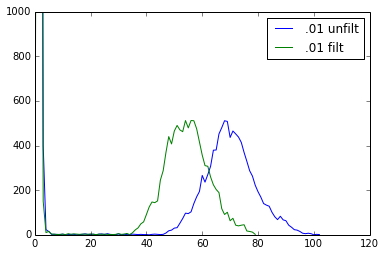

In [20]:
plot(dist3[:,0], dist3[:,1], label='.01 unfilt')
plot(fdist3[:,0], fdist3[:,1], label='.01 filt')
axis(ymin=0, ymax=1000)
legend()

## question:

Why is the green abundance distribution shifted left?? didn't we just eliminate abundance-1 k-mers?

In [22]:
## DIGRESSION - back to presentation to talk about digital normalization

In [23]:
# run digital normalization
!normalize-by-median.py -x 2e8 -N 4 -k 20 -C 20 reads-e010.fa


|| This is the script 'normalize-by-median.py' in khmer.
|| You are running khmer version 1.1
|| You are also using screed version 0.7
||
|| If you use this script in a publication, please cite EACH of the following:
||
||   * MR Crusoe et al., 2014. doi: 10.6084/m9.figshare.979190
||   * CT Brown et al., arXiv:1203.4802 [q-bio.GN]
||
|| Please see the CITATION file for details.


PARAMETERS:
 - kmer size =    20 		(-k)
 - n tables =     4 		(-N)
 - min tablesize = 2e+08 	(-x)

Estimated memory usage is 8e+08 bytes (n_tables x min_tablesize)
--------
making k-mer counting table
DONE with reads-e010.fa; kept 3482 of 10000 or 34%
output in reads-e010.fa.keep
fp rate estimated to be 0.000


In [24]:
# let's look at the abundance distribution post-diginorm
!abundance-dist-single.py -s -k 20 -x 1e8 reads-e010.fa.keep reads-e010-dn.dist


|| This is the script 'abundance-dist-single.py' in khmer.
|| You are running khmer version 1.1
|| You are also using screed version 0.7
||
|| If you use this script in a publication, please cite EACH of the following:
||
||   * MR Crusoe et al., 2014. doi: 10.6084/m9.figshare.979190
||   * Q Zhang et al., arXiv:1309.2975 [q-bio.GN]
||
|| Please see the CITATION file for details.


PARAMETERS:
 - kmer size =    20 		(-k)
 - n tables =     4 		(-N)
 - min tablesize = 1e+08 	(-x)

Estimated memory usage is 4e+08 bytes (n_tables x min_tablesize)
--------
making k-mer counting table
building k-mer tracking table
kmer_size: 20
k-mer counting table sizes: [100000007L, 100000037L, 100000039L, 100000049L]
outputting to reads-e010-dn.dist
consuming input, round 1 -- reads-e010.fa.keep
preparing hist from reads-e010.fa.keep...
consuming input, round 2 -- reads-e010.fa.keep


In [25]:
dist3_dn = numpy.loadtxt('reads-e010-dn.dist', delimiter=',', skiprows=1)

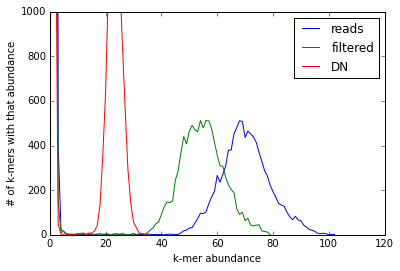

In [26]:
plot(dist3[:,0], dist3[:,1], label='reads')
plot(fdist3[:,0], fdist3[:,1], label='filtered')
plot(dist3_dn[:,0], dist3_dn[:,1], label='DN')

xlabel('k-mer abundance')
ylabel('# of k-mers with that abundance')
axis(ymin=0, ymax=1000)
legend()

### Note, after running digital normalization, you have a LOT less data:

In [27]:
!ls -la *e010*fa*

-rw-r--r-- 1 root root 1108890 Aug 14 17:27 reads-e010.fa
-rw-r--r-- 1 root root  816323 Aug 14 17:27 reads-e010.fa.abundfilt
-rw-r--r-- 1 root root  385392 Aug 14 17:31 reads-e010.fa.keep
